In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn as sk
from sklearn.preprocessing import QuantileTransformer, RobustScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sub = pd.read_csv('SampleSubmission.csv')

In [3]:
display(train.head())
display(test.head())
display(sub.head())

,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
0,ID_AAIethGy,Ethiopia,2016,R,0.0,0.000000,0.000000,0.000055,0.000536,0.999408,12.146134,25.489659,0.879484,0.000000,0.000000,0.000000,278.788451,769.338378,0.132783
1,ID_AAYiaCeL,Ethiopia,2005,R,0.0,0.000000,0.000110,0.000000,0.000018,0.999872,113.806716,64.136053,0.601427,0.000000,0.005427,0.000000,200.986978,337.135243,0.004898
2,ID_AAdurmKj,Mozambique,2009,R,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.400096,0.131900,0.000000,0.003078,0.000000,642.594208,169.913773,0.097320
3,ID_AAgNHles,Malawi,2015,R,0.0,0.000141,0.000181,0.000254,0.000228,0.999195,5.213320,25.379371,2.017136,11.293841,0.131035,0.000000,365.349451,613.591610,0.304107
4,ID_AAishfND,Guinea,2012,U,0.0,0.011649,0.017560,0.017383,0.099875,0.853533,31.734661,5.081620,22.815984,0.005047,0.130475,1.461894,222.867189,192.926363,0.605328


,ID,country,year,urban_or_rural,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,ID_AAcismbB,Democratic Republic of Congo,2007,R,0.000000,0.000000,0.000000,0.000523,0.000131,0.999347,0.660758,0.990942,0.132264,0.069055,0.032627,0.000000,1249.294720,1364.592100
1,ID_AAeBMsji,Democratic Republic of Congo,2007,U,0.000000,0.004239,0.000238,0.001227,0.002860,0.991437,6.441547,5.461365,0.452400,0.000000,0.000000,0.000000,821.019579,1046.028681
2,ID_AAjFMjzy,Uganda,2011,U,0.007359,0.525682,0.132795,0.095416,0.042375,0.196373,587.516458,2.881811,87.387991,3.248483,3.950374,60.070041,3.620455,906.057334
3,ID_AAmMOEEC,Burkina Faso,2010,U,0.000000,0.000089,0.000036,0.001519,0.001358,0.996997,35.141762,33.878927,4.166437,0.000000,0.130727,1.333999,109.493969,775.139189
4,ID_ABguzDxp,Zambia,2007,R,0.000000,0.000138,0.000623,0.000615,0.002961,0.995663,3.442449,33.491994,3.437129,0.133563,0.128997,0.502203,133.643319,835.591501


,ID,Target
0,ID_AAcismbB,0
1,ID_AAeBMsji,0
2,ID_AAjFMjzy,0
3,ID_AAmMOEEC,0
4,ID_ABguzDxp,0


In [4]:
for col in train.columns.values[1:4]:
    print(f'{col}, {train[col].nunique()}, {train[col].unique()}\n')
    
print('-'* 50)
for col in test.columns.values[1:4]:
    print(f'{col}, {train[col].nunique()}, {train[col].unique()}\n')

country, 18, ['Ethiopia' 'Mozambique' 'Malawi' 'Guinea' 'Cameroon' 'Ghana' 'Senegal'
 'Kenya' 'Tanzania' 'Mali' 'Swaziland' 'Rwanda' 'Nigeria' 'Lesotho'
 'Sierra Leone' 'Central African Republic' "Cote d'Ivoire" 'Togo']

year, 19, [2016 2005 2009 2015 2012 2004 2014 2010 2011 1998 2006 2008 2003 2007
 2013 1994 1996 1999 1995]

urban_or_rural, 2, ['R' 'U']

--------------------------------------------------
country, 18, ['Ethiopia' 'Mozambique' 'Malawi' 'Guinea' 'Cameroon' 'Ghana' 'Senegal'
 'Kenya' 'Tanzania' 'Mali' 'Swaziland' 'Rwanda' 'Nigeria' 'Lesotho'
 'Sierra Leone' 'Central African Republic' "Cote d'Ivoire" 'Togo']

year, 19, [2016 2005 2009 2015 2012 2004 2014 2010 2011 1998 2006 2008 2003 2007
 2013 1994 1996 1999 1995]

urban_or_rural, 2, ['R' 'U']



In [5]:
train.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
Target                                     0
dtype: int64

In [6]:
test.isnull().sum()

ID                                         0
country                                    0
year                                       0
urban_or_rural                             0
ghsl_water_surface                         0
ghsl_built_pre_1975                        0
ghsl_built_1975_to_1990                    0
ghsl_built_1990_to_2000                    0
ghsl_built_2000_to_2014                    0
ghsl_not_built_up                          0
ghsl_pop_density                           0
landcover_crops_fraction                   0
landcover_urban_fraction                   0
landcover_water_permanent_10km_fraction    0
landcover_water_seasonal_10km_fraction     0
nighttime_lights                           0
dist_to_capital                            0
dist_to_shoreline                          0
dtype: int64

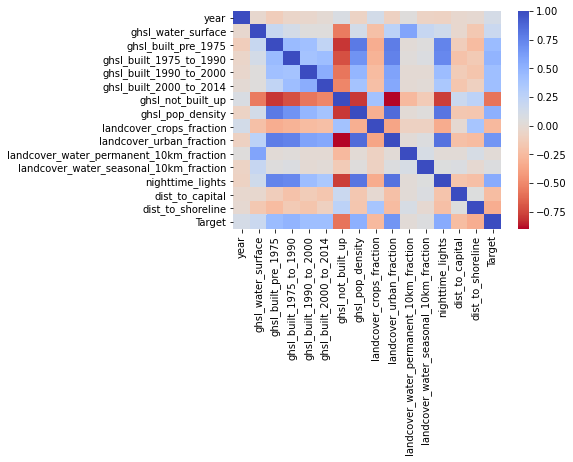

In [7]:
sns.heatmap(train.corr(), cmap= 'coolwarm_r', annot_kws = {'size': 20})
plt.show()

In [8]:
train.describe()

,year,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline,Target
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000
mean,2010.060874,0.028259,0.038222,0.028644,0.012689,0.018386,0.873800,95.756775,21.034265,13.999061,1.486849,0.714891,8.506543,289.722268,402.608539,0.350736
std,4.799579,0.097490,0.113562,0.077367,0.032745,0.040421,0.239294,209.704761,16.751106,23.715485,6.550171,2.383701,21.090378,238.811778,321.517285,0.194376
min,1994.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105306,0.112080,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000043,0.000124,0.897867,3.848533,5.610515,0.798841,0.000000,0.001325,0.000000,115.890873,126.379463,0.195772
50%,2011.000000,0.000000,0.000198,0.000709,0.001001,0.001871,0.991919,17.632672,18.509291,2.770159,0.000516,0.029151,0.137333,256.736472,327.271973,0.293574
75%,2014.000000,0.000000,0.007987,0.009868,0.008128,0.014936,0.999532,63.225683,33.590293,12.621501,0.152364,0.381969,4.830194,401.153071,643.910675,0.499003
max,2016.000000,0.969956,0.877116,0.685010,0.515534,0.649159,1.000000,1741.256516,80.064918,98.784092,99.164018,56.201637,382.932769,1897.351575,1769.523906,1.000000


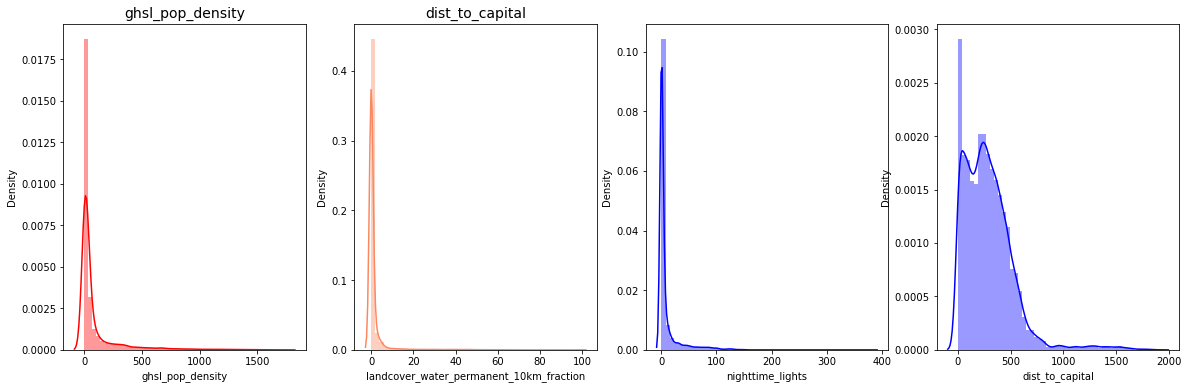

In [9]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize= (20, 6))

sns.distplot(train.ghsl_pop_density, ax= ax1, color = 'red')
ax1.set_title('ghsl_pop_density', fontsize = 14)

sns.distplot(train.landcover_water_permanent_10km_fraction, ax= ax2, color = '#FB8861')
ax2.set_title('landcover_water_permanent_10km_fraction', fontsize = 14)

sns.distplot(train.nighttime_lights, ax= ax3, color = 'blue')
ax2.set_title('nighttime_lights', fontsize = 14)

sns.distplot(train.dist_to_capital, ax= ax4, color = 'blue')
ax2.set_title('dist_to_capital', fontsize = 14)

plt.show()

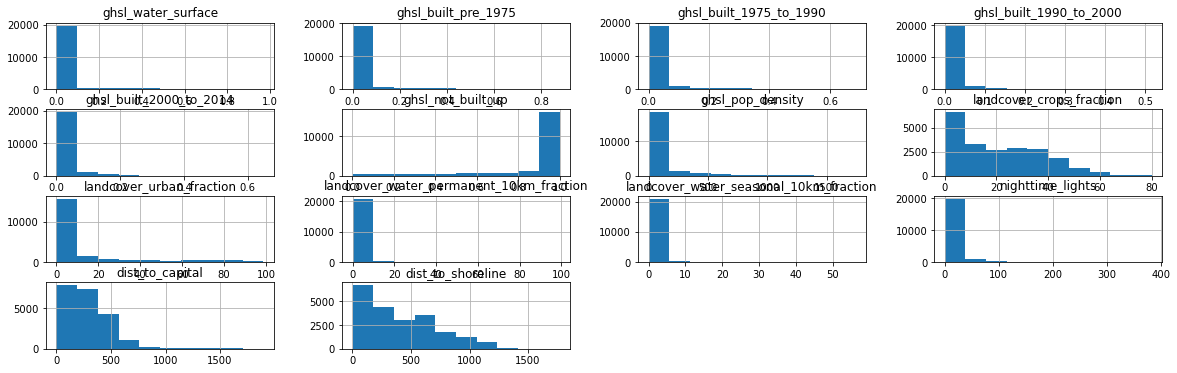

In [10]:
cols = train.columns.values[4:-1]
train[cols].hist(figsize= (20, 6))
plt.show()

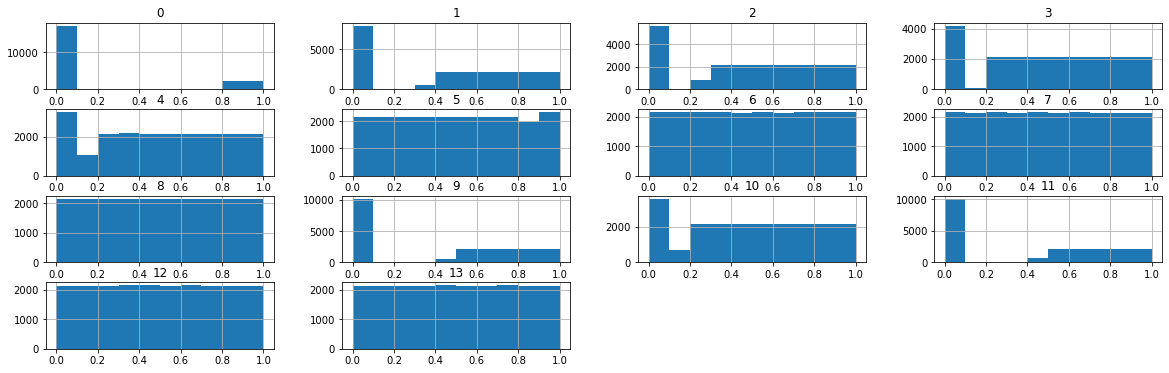

In [11]:
#transform to better distribution (former is too skewed)


cols = train.columns.values[4:-1]
#new_train = np.log(train[cols]+ 1)
#log doesn't maske it better, try quertile

quantile_transformer = QuantileTransformer(random_state=0)
new_train = quantile_transformer.fit_transform(train[cols])

pd.DataFrame(new_train).hist(figsize = (20, 6))
plt.show()

In [12]:
pd.DataFrame(new_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000,21454.000000
mean,0.184840,0.430776,0.465890,0.480951,0.488624,0.505869,0.497880,0.499997,0.499815,0.388269,0.486017,0.389761,0.500000,0.500001
std,0.363824,0.361393,0.332193,0.315515,0.305694,0.297918,0.292178,0.288696,0.289011,0.383906,0.309144,0.383306,0.288696,0.288692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250200,0.249926,0.250089,0.249855,0.250002,0.249984,0.000000,0.249854,0.000000,0.250066,0.250105
50%,0.000000,0.500406,0.500190,0.499933,0.500014,0.500026,0.500093,0.499850,0.500040,0.499780,0.500352,0.500099,0.499910,0.499908
75%,0.000000,0.749943,0.750051,0.750120,0.750109,0.749810,0.750052,0.750008,0.749873,0.749927,0.749930,0.750120,0.750017,0.750049
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Combining train and test data

In [13]:
#join, get dummy, scale the others, remove outliers
cols = train.columns.values[4:-1]
Test = test.copy()
Test['Target'] = 'test'
all_data = pd.concat([train , Test]).reset_index(drop = True)
dummy_cols = all_data.columns.values[1:4]

all_data = all_data.drop('ID', axis =1)
all_data = pd.get_dummies(columns = dummy_cols, data = all_data)

scale = RobustScaler()
for col in cols:
    all_data[col] = scale.fit_transform(all_data[col].values.reshape(-1, 1))

quant_transformer = QuantileTransformer(random_state =0)
norm_cols = quant_transformer.fit_transform(all_data[cols])
norm_cols_df = pd.DataFrame(norm_cols, columns = cols)
norm_data = all_data.drop(cols, axis =1).join(norm_cols_df, how = 'left')

norm_data.head()

,Target,country_Angola,country_Benin,country_Burkina Faso,country_Cameroon,country_Central African Republic,country_Cote d'Ivoire,country_Democratic Republic of Congo,country_Ethiopia,country_Ghana,...,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
0,0.132783,0,0,0,0,0,0,0,1,0,...,0.375051,0.724231,0.444816,0.608796,0.287381,0.000000,0.000000,0.000000,0.546044,0.775769
1,0.004898,0,0,0,0,0,0,0,1,0,...,0.171245,0.815006,0.814870,0.993173,0.225970,0.000000,0.348186,0.000000,0.398429,0.431556
2,0.09732,0,0,0,0,0,0,0,0,0,...,0.000000,1.000000,0.000000,0.211115,0.069316,0.000000,0.307556,0.000000,0.926993,0.258720
3,0.304107,0,0,0,0,0,0,0,0,0,...,0.302936,0.702249,0.316430,0.607211,0.449930,0.962865,0.631849,0.000000,0.688122,0.632077
4,0.605328,0,0,0,0,0,0,0,0,0,...,0.950280,0.220054,0.632333,0.227059,0.802838,0.571075,0.631409,0.630703,0.442793,0.284697


In [14]:
norm_data[cols].describe()

,ghsl_water_surface,ghsl_built_pre_1975,ghsl_built_1975_to_1990,ghsl_built_1990_to_2000,ghsl_built_2000_to_2014,ghsl_not_built_up,ghsl_pop_density,landcover_crops_fraction,landcover_urban_fraction,landcover_water_permanent_10km_fraction,landcover_water_seasonal_10km_fraction,nighttime_lights,dist_to_capital,dist_to_shoreline
count,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000,28648.000000
mean,0.192511,0.425603,0.461905,0.479355,0.487947,0.506259,0.496887,0.500001,0.499802,0.391947,0.485900,0.380133,0.499997,0.499999
std,0.368135,0.364793,0.336117,0.317436,0.306599,0.298487,0.293743,0.288695,0.289028,0.382405,0.309300,0.386931,0.288692,0.288689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.249956,0.249913,0.250074,0.250116,0.250057,0.249956,0.000000,0.250157,0.000000,0.250032,0.249974
50%,0.000000,0.499831,0.499979,0.500210,0.500142,0.500084,0.499964,0.499919,0.499984,0.500233,0.500130,0.499915,0.499990,0.499963
75%,0.000000,0.749982,0.750051,0.749909,0.750052,0.749931,0.750162,0.750047,0.750101,0.749962,0.750356,0.749962,0.749984,0.750019
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


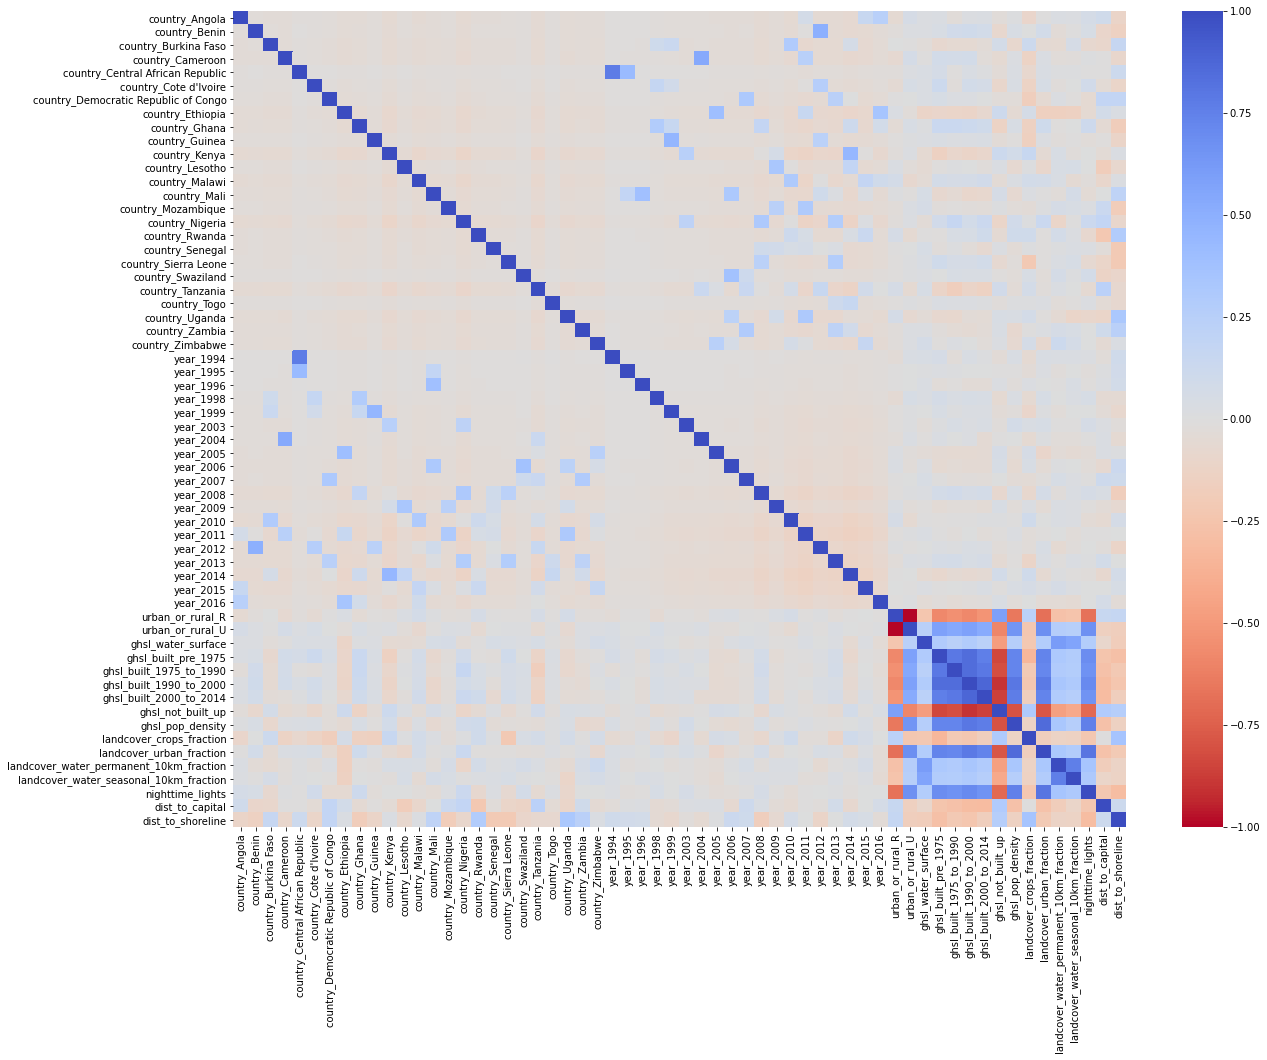

In [15]:
fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(norm_data.corr(), cmap ='coolwarm_r', annot_kws = {'size': 20})
plt.show()

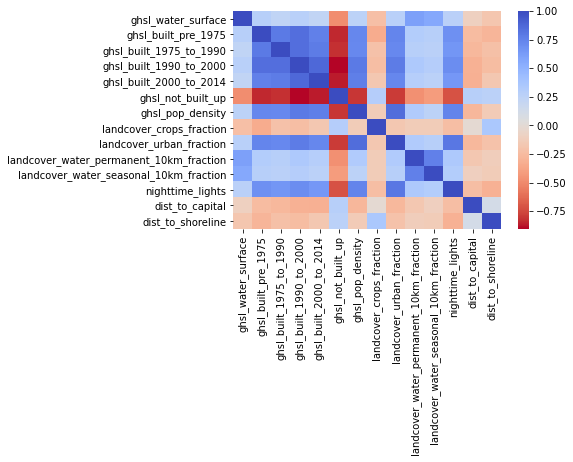

In [16]:
sns.heatmap(norm_data[cols].corr(), cmap = 'coolwarm_r', annot_kws = {'size': 20})
plt.show()

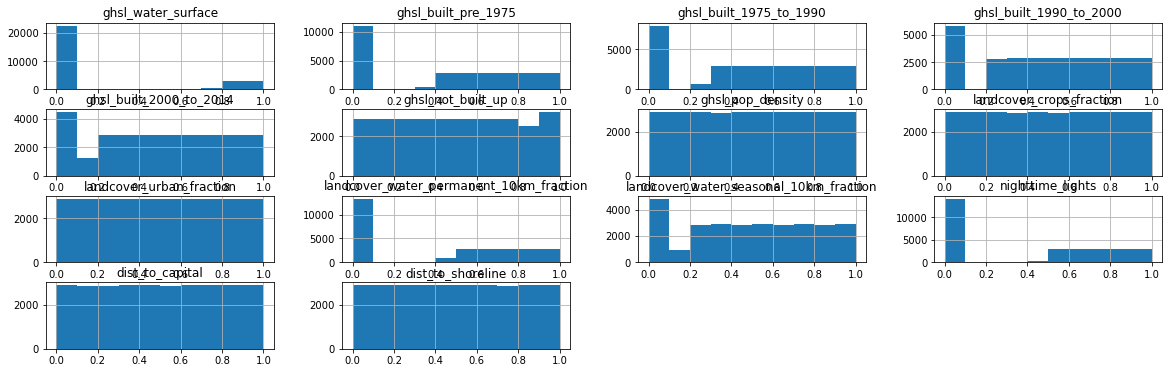

In [18]:
norm_data[cols].hist(figsize=(20,6))
plt.show()

## Spliting data back to train and test

In [19]:
all_train = norm_data.loc[norm_data.Target != 'test', :].reset_index(drop = True)
all_train.Target = all_train.Target.astype(float)
X =all_train.drop('Target', axis =1)
y = all_train['Target']

all_test = norm_data.loc[norm_data.Target == 'test', :].reset_index(drop = True)
all_test = all_test.drop('Target', axis =1)

In [20]:
all_train.to_csv('all_train.csv', index = False)
all_test.to_csv('all_test.csv', index = False)

In [21]:
def rmse(ytrue, ypred):
    return np.sqrt(mse(ytrue, ypred))

In [22]:
gb = GradientBoostingRegressor(n_estimators = 1000)
rf = RandomForestRegressor()
lgb = LGBMRegressor(learning_rate = 0.15)
xgb = XGBRegressor()
ada = AdaBoostRegressor()

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 42)

rf.fit(xtrain, ytrain)
print('RF RMSE Score xtrain: ', rmse(ytrain, rf.predict(xtrain)))
print('RMSE Score: ', rmse(ytest, rf.predict(xtest)))
print()

gb.fit(xtrain, ytrain)
print('GB RMSE Score xtrain: ', rmse(ytrain, gb.predict(xtrain)))
print('RMSE Score: ', rmse(ytest, gb.predict(xtest)))
print()

lgb.fit(xtrain, ytrain)
print('LGB RMSE Score xtrain: ', rmse(ytrain, lgb.predict(xtrain)))
print('RMSE Score: ', rmse(ytest, lgb.predict(xtest)))
print()

xgb.fit(xtrain, ytrain)
print('XGB RMSE Score xtrain: ', rmse(ytrain, xgb.predict(xtrain)))
print('RMSE Score: ', rmse(ytest, xgb.predict(xtest)))
print()

ada.fit(xtrain, ytrain)
print('ADA RMSE Score xtrain: ', rmse(ytrain, ada.predict(xtrain)))
print('RMSE Score: ', rmse(ytest, ada.predict(xtest)))

RF RMSE Score xtrain:  0.033943394427540505
RMSE Score:  0.09178200354986049

GB RMSE Score xtrain:  0.07189460306429282
RMSE Score:  0.08938842121276953

LGB RMSE Score xtrain:  0.07346905318332228
RMSE Score:  0.08879578562947812

XGB RMSE Score xtrain:  0.06055959512492007
RMSE Score:  0.08950292321604039

ADA RMSE Score xtrain:  0.13011929381186677
RMSE Score:  0.13132982411085548


In [25]:
lgb_cross_val = cross_val_score(lgb, X, y, cv = 3)
print('LGB Cross val score', lgb_cross_val.mean(axis=0))

LGB Cross val score 0.8001987008476045


In [26]:
sk.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

## GridSearch

In [27]:
lgbm = LGBMRegressor()

param_grid = {'learning_rate': [0.1, 0.15,  0.2],
             'n_estimators': [100, 200, 400]}
grid = GridSearchCV(lgbm, param_grid, scoring = 'neg_mean_squared_error', cv =3)
grid.fit(X, y)

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'n_estimators': [100, 200, 400]},
             scoring='neg_mean_squared_error')

In [28]:
pd.DataFrame(grid.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.898633,0.182973,0.083771,0.008324,0.1,100,"{'learning_rate': 0.1, 'n_estimators': 100}",-0.007596,-0.007727,-0.007426,-0.007583,0.000123,5
1,0.827115,0.058712,0.127478,0.005697,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",-0.007486,-0.007669,-0.007332,-0.007496,0.000138,1
2,1.368151,0.038252,0.216878,0.006898,0.1,400,"{'learning_rate': 0.1, 'n_estimators': 400}",-0.007521,-0.007707,-0.007414,-0.007547,0.000121,3
3,0.527791,0.112237,0.086089,0.012934,0.15,100,"{'learning_rate': 0.15, 'n_estimators': 100}",-0.007554,-0.007724,-0.007354,-0.007544,0.000151,2
4,0.815195,0.112336,0.109929,0.001873,0.15,200,"{'learning_rate': 0.15, 'n_estimators': 200}",-0.007534,-0.007751,-0.007404,-0.007563,0.000143,4


In [29]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

## Using KFold

In [30]:
n_f = 10
kfold = KFold(n_f)
scores = []
test_preds = []

for idx, (train_idx, valid_idx) in enumerate(kfold.split(X, y)):
    print('fold ', idx)
    print('-'* 50)
    xtrain, ytrain = X.loc[train_idx, :], y[train_idx]
    xvalid, yvalid = X.loc[valid_idx, :], y[valid_idx]
    
    model = LGBMRegressor(n_estimators = 200, learning_rate = 0.1)
    model.fit(xtrain, ytrain)
    score = rmse(model.predict(xvalid), yvalid)
    scores.append(score)
    test_preds.append(model.predict(all_test))
    print('Valid Score: ', score)

fold  0
--------------------------------------------------
Valid Score:  0.08446176769277576
fold  1
--------------------------------------------------
Valid Score:  0.08713143576226222
fold  2
--------------------------------------------------
Valid Score:  0.08544294071466746
fold  3
--------------------------------------------------
Valid Score:  0.08384420225949783
fold  4
--------------------------------------------------
Valid Score:  0.08770445329440014
fold  5
--------------------------------------------------
Valid Score:  0.088000746260981
fold  6
--------------------------------------------------
Valid Score:  0.08536743732133902
fold  7
--------------------------------------------------
Valid Score:  0.08280905493702052
fold  8
--------------------------------------------------
Valid Score:  0.0853105338268949
fold  9
--------------------------------------------------
Valid Score:  0.08594943666303266


In [31]:
sub['Target'] = np.mean(test_preds, axis = 0)
sub.to_csv('target.csv', index = False)
sub.head()

,ID,Target
0,ID_AAcismbB,0.137290
1,ID_AAeBMsji,0.203662
2,ID_AAjFMjzy,0.640242
3,ID_AAmMOEEC,0.369739
4,ID_ABguzDxp,0.197194
